<a href="https://colab.research.google.com/github/darkengross/NLP_Novel_Analysis/blob/main/A_Graders_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

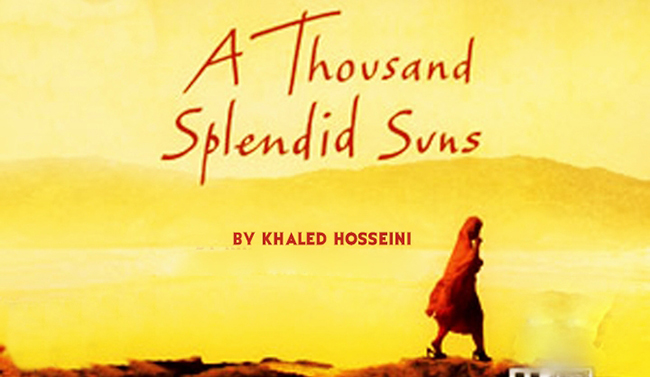

#NLP PROJECT
###Members
- Khushal Goyal : 21ucs109
- Kushal singh  : 21ucs114
- Aanya Jain    : 21ucs250
- Nukul Sharma  : 21ucs253

###Table Of Contents
- Getting Data
- Text cleaning using Reguar expressions
- Data preprocessing (Tokenization, etc...)
- Pos-Tagging using
- bi-gram modelling on chapter 1
- shannon game on chapter 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from collections import Counter

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk import pos_tag


In [ ]:
from google.colab import files
file_path='/content/A Thousand Splendid Suns.txt'
with open(file_path, 'r') as file:
    content = file.read()

print("File Content:")
print(content)


File Content:
A THOUSAND SPLENDID SUNS


1

A THOUSAND SPLENDID SUNS

A THOUSAND SPLENDID SUNS

2

A THOUSAND SPLENDID SUNS

3

4


PART ONE
1.



Mariam was five years old the first time she heard the word harami.

It happened on a Thursday. It must have, because Mariam remembered that she had been
restless and preoccupied that day, the way she was only on Thursdays, the day when Jalil
visited her at the kolba. To pass the time until the moment that she would see him at last,
crossing the knee-high grass in the clearing and waving, Mariam had climbed a chair and
taken down her mother's Chinese tea set. The tea set was the sole relic that Mariam's
mother, Nana, had of her own mother, who had died when Nana was two. Nana cherished
each blue-and-white porcelain piece, the graceful curve of the pot's spout, the hand-painted
finches and chrysanthemums, the dragon on the sugar bowl, meant to ward off evil.
It was this last piece that slipped from Mariam's fingers, that fell to the wooden

In [83]:
print("Length of the book ",len(content))
print("Data type of the content object is",type(content))

Length of the book  589259
Data type of the content object is <class 'str'>


##Text cleaning using Reguar expressions

In [ ]:


pattern1 = re.compile(r'A THOUSAND SPLENDID SUNS', re.IGNORECASE)
pattern2 = r'\*{3}'
pattern3 = re.compile(r'AFTERWORD.*', re.DOTALL)

punctuation_pattern = re.compile(r'[^\w\s]')
page_number_pattern = re.compile(r'\b(?:[1-9]|[1-9]\d|1\d{2}|200|2[0-9][0-9]|300)\b')
chinese_pattern = re.compile(r'[\u4e00-\u9fff]+', re.UNICODE)

txt_without_headers = re.sub(pattern1, '', content)
txt_without_page_numbers = re.sub(page_number_pattern, '', txt_without_headers)
txt_without_chinese_characters = re.sub(chinese_pattern, '', txt_without_page_numbers)
filtered_text = re.sub(pattern2, '', txt_without_chinese_characters)

text_without_punctuation = re.sub(pattern3, '', filtered_text)
final_text = re.sub(punctuation_pattern, '', text_without_punctuation)

print("Modified Text:")
print(final_text)


Modified Text:


















PART ONE




Mariam was five years old the first time she heard the word harami

It happened on a Thursday It must have because Mariam remembered that she had been
restless and preoccupied that day the way she was only on Thursdays the day when Jalil
visited her at the kolba To pass the time until the moment that she would see him at last
crossing the kneehigh grass in the clearing and waving Mariam had climbed a chair and
taken down her mothers Chinese tea set The tea set was the sole relic that Mariams
mother Nana had of her own mother who had died when Nana was two Nana cherished
each blueandwhite porcelain piece the graceful curve of the pots spout the handpainted
finches and chrysanthemums the dragon on the sugar bowl meant to ward off evil
It was this last piece that slipped from Mariams fingers that fell to the wooden floor
boards of the kolba and shattered
When Nana saw the bowl her face flushed red and her upper lip shivered and her eyes
bot

In the code snippit above we have used regular expressions to remove some unwanted data items. These are:
1. The running sections 'A THOUSAND SPLENDID SUNS'
2. There were also some chinese characters that were present in the end of the document
3. Intial introduction about author and related sections and the end disclaimer and related sections which did not hold any symantic value.
4. page numbers.
5. punctuations.


##Data Preprocessing

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

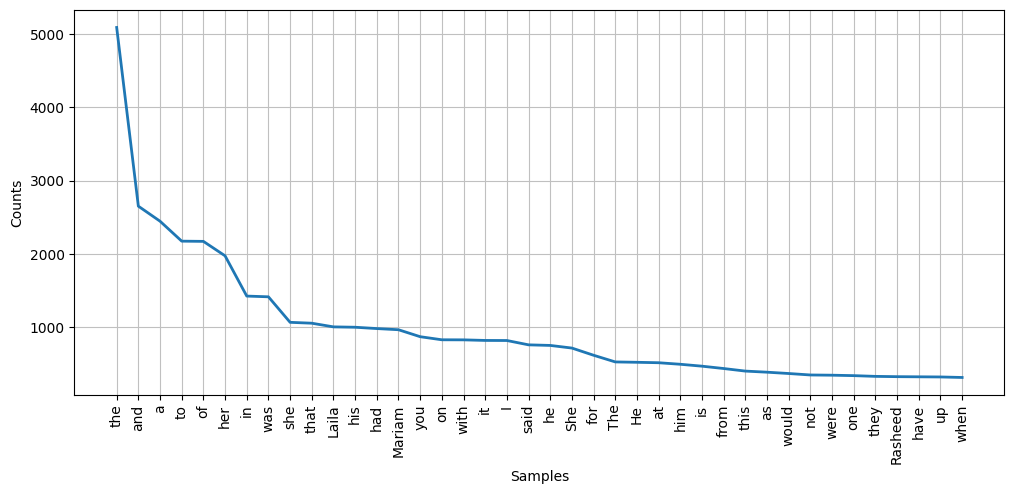

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
tokens = word_tokenize(final_text)
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

We tokenized the document using word_tokenize method defined in nltk library. we can also obseve that the a lot of the words are stopwords in the chosen novel.

In [86]:
len(tokens)
# This shows that lot of the values in the data was spaces and punctuatuions

103839

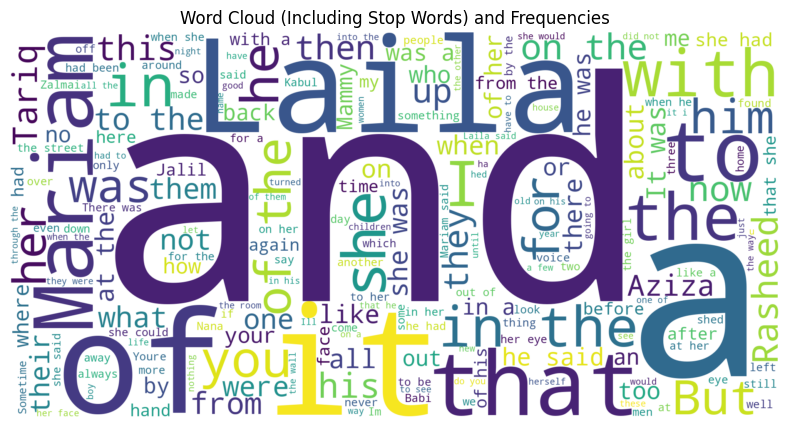

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(tokens)

wordcloud = WordCloud(width=2000, height=1000, background_color='white', stopwords={}).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (Including Stop Words) and Frequencies")
plt.show()


It can be observed from the word cloud that the frequency of the stop words are extremely high.

In [ ]:
nltk.download('stopwords')

words = word_tokenize(text)

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

print("Tokenized Text without Stop Words:")
print(filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Tokenized Text without Stop Words:
['PART', 'ONE', 'Mariam', 'five', 'years', 'old', 'first', 'time', 'heard', 'word', 'harami', 'happened', 'Thursday', 'must', 'Mariam', 'remembered', 'restless', 'preoccupied', 'day', 'way', 'Thursdays', 'day', 'Jalil', 'visited', 'kolba', 'pass', 'time', 'moment', 'would', 'see', 'last', 'crossing', 'kneehigh', 'grass', 'clearing', 'waving', 'Mariam', 'climbed', 'chair', 'taken', 'mothers', 'Chinese', 'tea', 'set', 'tea', 'set', 'sole', 'relic', 'Mariams', 'mother', 'Nana', 'mother', 'died', 'Nana', 'two', 'Nana', 'cherished', 'blueandwhite', 'porcelain', 'piece', 'graceful', 'curve', 'pots', 'spout', 'handpainted', 'finches', 'chrysanthemums', 'dragon', 'sugar', 'bowl', 'meant', 'ward', 'evil', 'last', 'piece', 'slipped', 'Mariams', 'fingers', 'fell', 'wooden', 'floor', 'boards', 'kolba', 'shattered', 'Nana', 'saw', 'bowl', 'face', 'flushed', 'red', 'upper', 'lip', 'shivered', 'eyes', 'lazy', 'one', 'good', 'settled', 'Mariam', 'flat', 'unblinking',

In this code we are using stopwords from nltk library and then looping through our document and at each data point, we are basically checking that is the given word present in the stopword collection. If yes then remove it from our data.

Most common words and their frequencies:
Laila: 1006
Mariam: 967
said: 761
would: 370
one: 341
Rasheed: 327
Tariq: 277
like: 267
back: 261
could: 230
time: 207
see: 197
eyes: 197
Aziza: 185
face: 182
Mammy: 167
room: 162
around: 156
way: 154
saw: 154


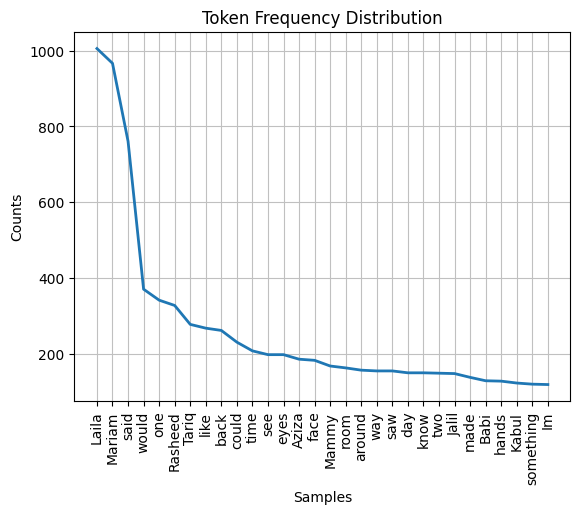

<Axes: title={'center': 'Token Frequency Distribution'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
freq_dist = FreqDist(filtered_words)

most_common = freq_dist.most_common(20)
print("Most common words and their frequencies:")
for word, freq in most_common:
    print(f"{word}: {freq}")

plt.title("Token Frequency Distribution")
freq_dist.plot(30, cumulative=False)


After removing the stop words in the previous sections, we are using matplotlib library to map a frequency plot of the words that we have. It can be observed that the word *Laila* and *Mariam* is the two most frequent words. Would this affect our part of speech tagging?? Lets check that in the next section

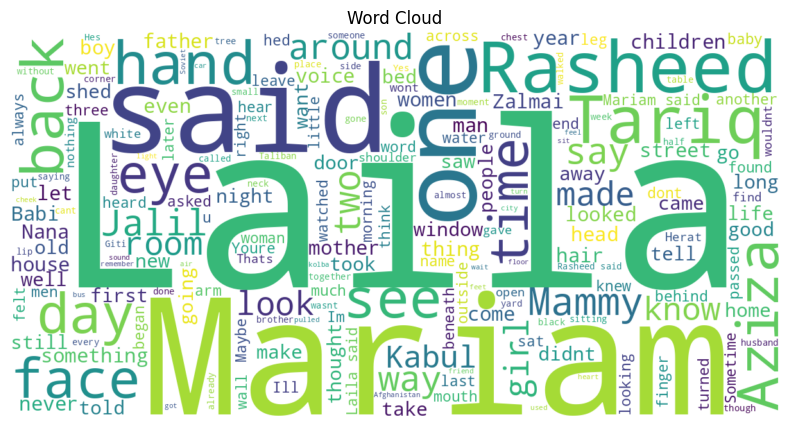

In [ ]:
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(" ".join(filtered_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()

This is the word colud that we get after removing stop words. Looking at it now it becomes clearer than before.

##POS-tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
pos_tagged_words = pos_tag(filtered_words)
pos_tagged_words[:15]

[('PART', 'NN'),
 ('ONE', 'CD'),
 ('Mariam', 'NNP'),
 ('five', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 ('first', 'JJ'),
 ('time', 'NN'),
 ('heard', 'NN'),
 ('word', 'NN'),
 ('harami', 'NN'),
 ('happened', 'VBD'),
 ('Thursday', 'NNP'),
 ('must', 'MD'),
 ('Mariam', 'NNP')]

In this code we use average perceptron tagger to tag our tokens.

The nltk.tag.AveragedPerceptronTagger is the default tagger as of NLTK version 3.1. The model was trained on on Sections 00-18 of the Wall Street Journal sections of OntoNotes 5

The original implementation comes from Matthew Honnibal, it outperforms the predecessor maximum entropy POS model in NLTK and is based on semi supervised deep learning algorithms

<BarContainer object of 30 artists>

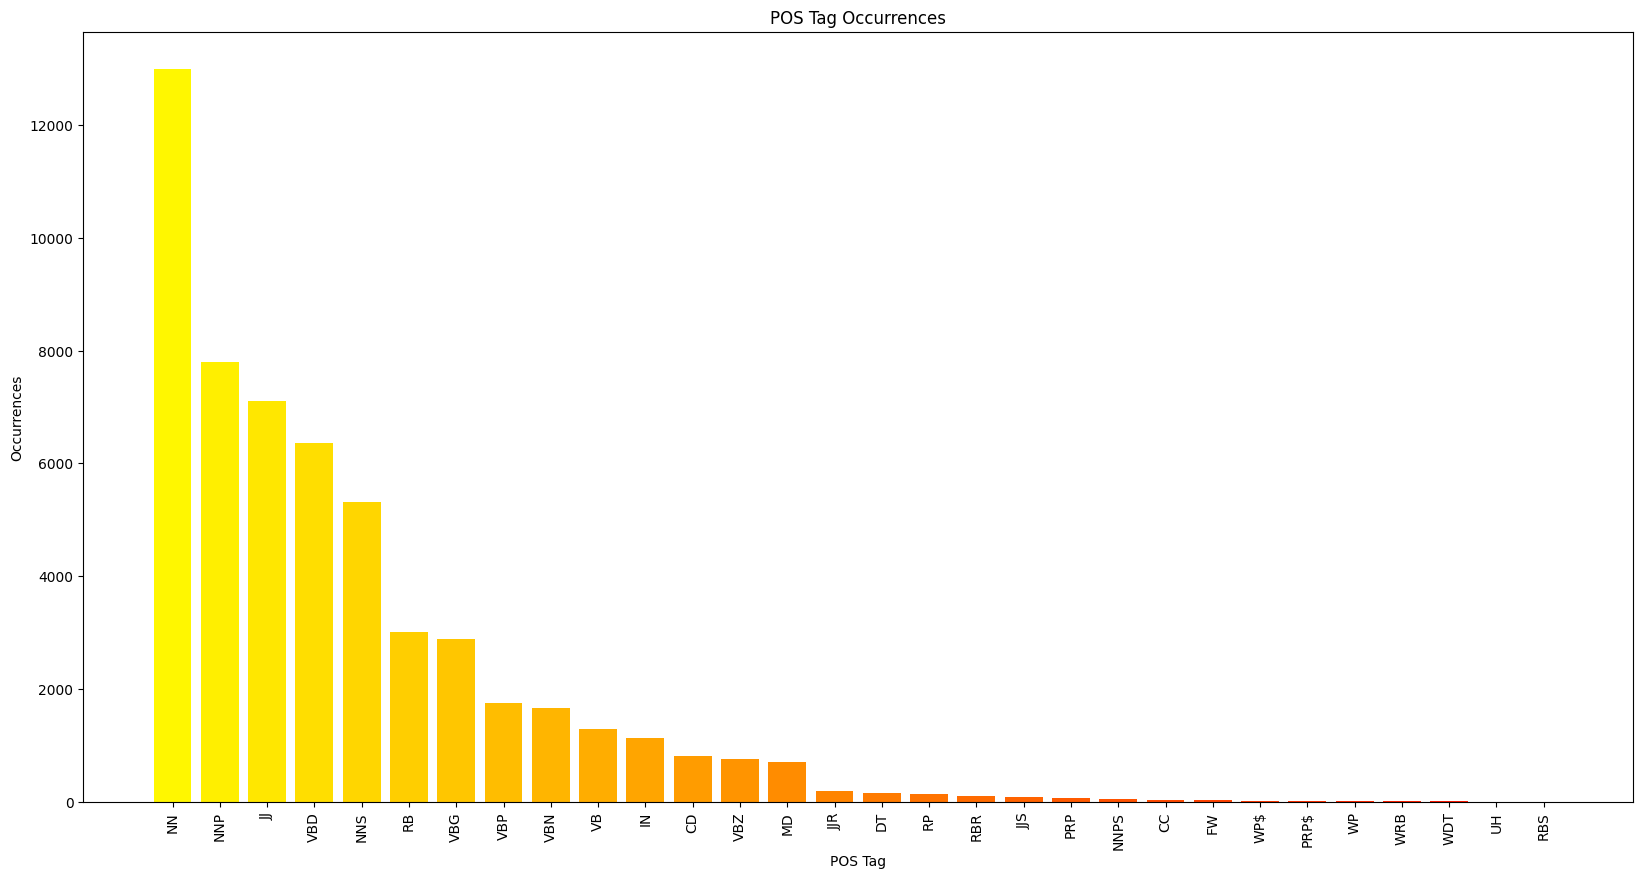

In [79]:
tag_counts = Counter(tag for word, tag in pos_tagged_words)

tags, counts = zip(*sorted(tag_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(20, 10))
plt.xlabel('POS Tag')
plt.ylabel('Occurrences')
plt.title('POS Tag Occurrences')
plt.xticks(rotation=90)
plt.bar(tags, counts, color=sns.color_palette("autumn_r",len(tags)))


This plot quietly answers the question that we asked in the last section. Since we have a large number of  *Laila* and *Mariam* which in most cases would be tagged as a NN. So the tag category NN is most frequent in our scenario.

##Bi-gram modelling


In [ ]:
start_index = tokens.index('ONE') + 1
end_index = tokens.index('PART', start_index)

selected_words = tokens[start_index:end_index]

selected_words[:15]

['Mariam',
 'was',
 'five',
 'years',
 'old',
 'the',
 'first',
 'time',
 'she',
 'heard',
 'the',
 'word',
 'harami',
 'It',
 'happened']

In this code we use slicing method to find al the words between chapter 1 and 2

In [ ]:
len(selected_words)

26101

shows the length of the chapter 1

In [ ]:
Chapter1to2 = selected_words

In [ ]:
from nltk.util import bigrams

importing bigram model

In [88]:
bi_grams = list(bigrams(Chapter1to2))

finding bigrmas of the word in chapter 1

In [ ]:
bigrams_frequency = nltk.FreqDist(bi_grams)

finding frequency distribution of the words in chapter 1

In [ ]:
cfd = nltk.ConditionalFreqDist(bi_grams)

finding conditional probability distribution of words in chapter 1

In [ ]:
unique_words = list(set(word for bigram in bigrams_frequency for word in bigram))
bigram_matrix = pd.DataFrame(0, columns=unique_words, index=unique_words, dtype=float)
word_freq = nltk.FreqDist(Chapter1to2)
bigram_probabilities = {}

for word1 in unique_words:
    for word2 in unique_words:
        conditional_freq = cfd[word1][word2]
        first_word_count = word_freq[word1]
        probability = float(conditional_freq)/(first_word_count)
        bigram_probabilities[word1, word2] = probability
        bigram_matrix.at[word1, word2] = probability


bigram_matrix = bigram_matrix.fillna(0)


print(bigram_matrix)

           etched   As  humored  muted  building  pairs  RasheedS  betray  \
etched        0.0  0.0      0.0    0.0       0.0    0.0       0.0     0.0   
As            0.0  0.0      0.0    0.0       0.0    0.0       0.0     0.0   
humored       0.0  0.0      0.0    0.0       0.0    0.0       0.0     0.0   
muted         0.0  0.0      0.0    0.0       0.0    0.0       0.0     0.0   
building      0.0  0.0      0.0    0.0       0.0    0.0       0.0     0.0   
...           ...  ...      ...    ...       ...    ...       ...     ...   
meek          0.0  0.0      0.0    0.0       0.0    0.0       0.0     0.0   
meat          0.0  0.0      0.0    0.0       0.0    0.0       0.0     0.0   
swallowed     0.0  0.0      0.0    0.0       0.0    0.0       0.0     0.0   
slipped       0.0  0.0      0.0    0.0       0.0    0.0       0.0     0.0   
ahijab        0.0  0.0      0.0    0.0       0.0    0.0       0.0     0.0   

           bones  weak  ...  triangular  transform  gazed  aristocracy  bur

making a bigram matrix to find the probabilty value of each word

In [ ]:
top_ten_bigrams = sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)[:15]


print("Top Ten Bigrams with Maximum Probability:")
for bigram, probability in top_ten_bigrams:
    word1, word2 = bigram
    print(f"{word1} -> {word2}: Probability = {probability:.4f}")


Top Ten Bigrams with Maximum Probability:
etched -> with: Probability = 1.0000
humored -> almost: Probability = 1.0000
muted -> consoling: Probability = 1.0000
building -> had: Probability = 1.0000
pairs -> of: Probability = 1.0000
RasheedS -> idea: Probability = 1.0000
betray -> you: Probability = 1.0000
bones -> She: Probability = 1.0000
weak -> Khadija: Probability = 1.0000
marigolds -> and: Probability = 1.0000
noodles -> at: Probability = 1.0000
jovial -> way: Probability = 1.0000
roasted -> almonds: Probability = 1.0000
importance -> of: Probability = 1.0000
queasy -> stomach: Probability = 1.0000


finding the top 15 words with the highest probabilty

##Shannon's Game

In [85]:
bigram_probabilities

{('etched', 'etched'): 0.0,
 ('etched', 'As'): 0.0,
 ('etched', 'humored'): 0.0,
 ('etched', 'muted'): 0.0,
 ('etched', 'building'): 0.0,
 ('etched', 'pairs'): 0.0,
 ('etched', 'RasheedS'): 0.0,
 ('etched', 'betray'): 0.0,
 ('etched', 'bones'): 0.0,
 ('etched', 'weak'): 0.0,
 ('etched', 'marigolds'): 0.0,
 ('etched', 'noodles'): 0.0,
 ('etched', 'jovial'): 0.0,
 ('etched', 'roasted'): 0.0,
 ('etched', 'importance'): 0.0,
 ('etched', 'we'): 0.0,
 ('etched', 'housekeepers'): 0.0,
 ('etched', 'queasy'): 0.0,
 ('etched', 'free'): 0.0,
 ('etched', 'sticks'): 0.0,
 ('etched', 'chapan'): 0.0,
 ('etched', 'fireworks'): 0.0,
 ('etched', 'excitedly'): 0.0,
 ('etched', 'Lets'): 0.0,
 ('etched', 'fond'): 0.0,
 ('etched', 'walnut'): 0.0,
 ('etched', 'foolish'): 0.0,
 ('etched', 'bulge'): 0.0,
 ('etched', 'truths'): 0.0,
 ('etched', 'palate'): 0.0,
 ('etched', 'seamless'): 0.0,
 ('etched', 'rug'): 0.0,
 ('etched', 'emptied'): 0.0,
 ('etched', 'took'): 0.0,
 ('etched', 'Up'): 0.0,
 ('etched', 'visit'

we will be using this probability distribution that we obtained from the chapter 1 and will use this to play shannon's game in chapter 2

In [66]:
def make_guess(previous_word, bigram_probabilities):
    later_probabilities = {word: prob for (prev, word), prob in bigram_probabilities.items() if prev == previous_word}
    optimal_guesses = sorted(later_probabilities, key=later_probabilities.get, reverse=True)
    return optimal_guesses

This is a function called make_guess that will take a word and bigram probabilities and based on the probabilities, it will ouput a list of most probable word that will occur after the previous_word

In [77]:
def play_shannons_game(existing_string, bigram_probabilities):
        s=""
        print("Welcome to Shannon's Game!")
        print("Think of a word, and I will try to guess it based on the provided string.")
        print("Please respond with 'yes' or 'no' to my guesses.")
        print("You can end the game by typing 'exit'.")
        previous_word = input("Think of a starting word: ")
        print(f"Starting word: {previous_word}")
        s=s+" "+previous_word
        while True:
              guesses = make_guess(previous_word, bigram_probabilities)
              for guess in guesses:
                  response = input(f"Is it '{guess}'? (yes/no): ")
                  if response == 'yes':
                      previous_word = guess
                      s=s+" "+guess
                      print(f"Sentence: {s}")
                      break
                  elif response=='no':
                      continue
                  elif response == 'exit':
                      print("Thanks for playing!")
                      return
                  else:
                      print("No more guesses. Thanks for playing!")
                      return


This here is the main functions that will play the shanon game. It will take a string that will be the first word and will fill the words according to the probabilities found.

In [60]:
start_index = tokens.index('TWO') + 1
end_index = tokens.index('PART', start_index)

chapter2to3 = tokens[start_index:end_index]

chapter2to3[:15]

['Kabul',
 'Spring',
 '1987',
 'Nine',
 'year',
 'old',
 'Laila',
 'rose',
 'from',
 'bed',
 'as',
 'she',
 'did',
 'most',
 'mornings']

Same code as before, however this code will be used to find the words between chapter 2 and 3

In [89]:
play_shannons_game(chapter2to3, bigram_probabilities)

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: harami
Starting word: harami
Is it 'Hardly'? (yes/no): yes
Sentence:  harami Hardly
Is it 'anyone'? (yes/no): no
Is it 'etched'? (yes/no): yes
Sentence:  harami Hardly etched
Is it 'with'? (yes/no): no
Is it 'etched'? (yes/no): exit
Thanks for playing!


In [78]:
play_shannons_game(chapter2to3, bigram_probabilities)

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: it
Starting word: it
Is it 'was'? (yes/no): no
Is it 'Mariam'? (yes/no): no
Is it 'in'? (yes/no): no
Is it 'They'? (yes/no): yes
Sentence:  it They
Is it 'had'? (yes/no): yes
Sentence:  it They had
Is it 'been'? (yes/no): exit
Thanks for playing!
